<a href="https://colab.research.google.com/github/vivsarraf/Project-4/blob/Ajunjee/Project_4_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

#  Import and read the csv.
import pandas as pd
sales_data_df = pd.read_csv("cleaned-property-sales-data.csv")
sales_data_df.head()

,Unnamed: 0,PropertyID,PropType,Address,Style,Year_Built,FinishedSqft,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price,year,month
0,1,98477.0,Residential,9574 N 107TH ST,Cape Cod,1942.0,1182.0,4.0,1.0,1.0,33541.0,2023-12-15,160000.0,2023,12
1,2,98500.0,Residential,9531 N MICHAEL CT,Ranch,2006.0,1880.0,3.0,2.0,0.0,10607.0,2023-08-31,387500.0,2023,8
2,3,98566.0,Residential,9350 N JOYCE AV,Ranch,1980.0,1489.0,3.0,3.0,0.0,8640.0,2023-08-25,335000.0,2023,8
3,4,98598.0,Residential,9355 N BURBANK AV,Ranch,1986.0,1209.0,3.0,1.0,1.0,7200.0,2023-06-20,250000.0,2023,6
4,5,98624.0,Residential,8210 W GLENBROOK RD,Colonial,1989.0,1663.0,3.0,2.0,1.0,7200.0,2023-01-10,270000.0,2023,1


In [2]:
sales_data_df.isnull().sum()

Unnamed: 0          0
PropertyID      18069
PropType            0
Address             0
Style               0
Year_Built          0
FinishedSqft        0
Bdrms               0
Fbath               0
Hbath               0
Lotsize             0
Sale_date           0
Sale_price          0
year                0
month               0
dtype: int64

In [3]:
y = sales_data_df.Sale_price.values
X = sales_data_df.drop(columns = ['Unnamed: 0','PropertyID', 'PropType', 'Address','Style','Year_Built','Sale_date', 'Sale_price', 'month'], axis=1)
X.head()


,FinishedSqft,Bdrms,Fbath,Hbath,Lotsize,year
0,1182.0,4.0,1.0,1.0,33541.0,2023
1,1880.0,3.0,2.0,0.0,10607.0,2023
2,1489.0,3.0,3.0,0.0,8640.0,2023
3,1209.0,3.0,1.0,1.0,7200.0,2023
4,1663.0,3.0,2.0,1.0,7200.0,2023


In [4]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, train_size=0.9, random_state=1)

In [5]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Define the the number of inputs (features) to the model
number_input_features = len(X.iloc[0])

# Review the number of features
number_input_features

6

In [7]:
# Define the number of neurons in the output layer
number_output_neurons = 1

# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 = 16

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 = 16

# Review the number hidden nodes in the second layer
hidden_nodes_layers = hidden_nodes_layer1 + hidden_nodes_layer2
hidden_nodes_layers

32

In [8]:
# Create the Sequential model instance
nn = Sequential()

# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [9]:
# Display the Sequential model summary
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                112       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# # Fit the model using 100 epochs and the training data
# fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

In [12]:
# # Evaluate the model loss and accuracy metrics using the evaluate method and the TRAIN data
# model_loss, model_accuracy = nn.evaluate(X_train_scaled, y_train,verbose=0)

# # Display the model loss and accuracy results
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [13]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("By using Linear Regression we got:")
print("Training data accuracy",lr_model.score(X_train, y_train))
print("Testing data accuracy",lr_model.score(X_test, y_test))

By using Linear Regression we got:
Training data accuracy 0.2645586558419101
Testing data accuracy -6.617828593457079


In [14]:
from sklearn.ensemble import RandomForestRegressor
rfm=RandomForestRegressor()
rfm.fit(X_train,y_train)

print(rfm.score(X_train,y_train))
print(rfm.score(X_test,y_test))

0.9154449527629253
0.45360747534005164


In [15]:
y_pred = rfm.predict(X_test)

In [19]:
# Calculating R2 value or Coefficient of Determination
test_set_r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination:",test_set_r2)

Coefficient of Determination: 0.45360747534005164


In [18]:
# Calculating MAE or Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 51523.40620322327


In [22]:
# Calculating RMSE or Root Mean Square Error
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 72401.02546335313


In [23]:
# Comparing the MAE with Mean of the actual values (y_test)
print(f"The MAE is {(mae/np.mean(y_test))*100:.2f}% of Average of y_test ({np.mean(y_test):,.0f})")

The MAE is 32.48% of Average of y_test (158,611)


In [25]:
# Comparing the RMSE with Mean of the actual values (y_test)
print(f"The RMSE is {(rmse/np.mean(y_test))*100:.2f}% of Average of y_test ({np.mean(y_test):,.0f})")

The RMSE is 45.65% of Average of y_test (158,611)


In [30]:
# Comparing some of the individual actual values (y_test) with their respective predicted values (y_pred)
for i in range(50):
    print(f"y_test[{i}]: {y_test[i]:10,.0f}    y_pred[{i}]: {y_pred[i]:10,.0f}   Difference (% of y_test): {((y_pred[i]-y_test[i])/y_test[i])*100:6.2f}%")

y_test[0]:     45,000    y_pred[0]:     89,290   Difference (% of y_test):  98.42%
y_test[1]:    272,000    y_pred[1]:    178,518   Difference (% of y_test): -34.37%
y_test[2]:    120,900    y_pred[2]:    146,060   Difference (% of y_test):  20.81%
y_test[3]:     79,500    y_pred[3]:    109,857   Difference (% of y_test):  38.19%
y_test[4]:    127,000    y_pred[4]:    234,953   Difference (% of y_test):  85.00%
y_test[5]:    162,500    y_pred[5]:    138,648   Difference (% of y_test): -14.68%
y_test[6]:    167,500    y_pred[6]:    146,488   Difference (% of y_test): -12.54%
y_test[7]:    180,000    y_pred[7]:    151,881   Difference (% of y_test): -15.62%
y_test[8]:    135,000    y_pred[8]:     86,503   Difference (% of y_test): -35.92%
y_test[9]:    285,000    y_pred[9]:    132,813   Difference (% of y_test): -53.40%
y_test[10]:    265,000    y_pred[10]:    255,582   Difference (% of y_test):  -3.55%
y_test[11]:    178,400    y_pred[11]:    154,074   Difference (% of y_test): -13.64%


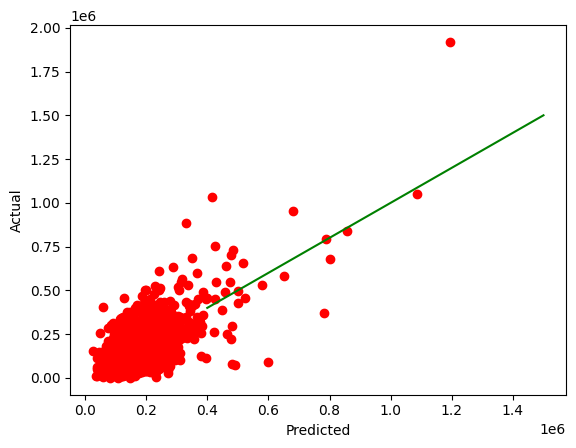

In [29]:
# Plotting graph between real and predicted values
plt.plot(y_pred,y_test,'ro')
plt.plot([400000,1500000],[400000,1500000], 'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()